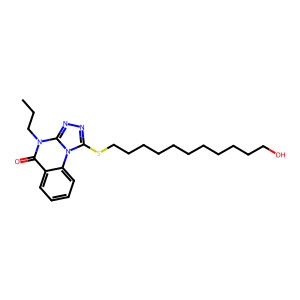

In [17]:
from rdkit.Chem import Draw
Draw.MolToImage(Chem.MolFromSmiles('CCCn1c(=O)c2ccccc2n2c(SCCCCCCCCCCCO)nnc12'))

In [1]:
import pandas as pd

chd1 = pd.read_csv("~/HIDDEN-GEM/CHD1/CHD1_gem.csv", nrows=10000)

In [2]:
chd1

,smiles,score
0,[O-]S(=O)(=O)c(c1N)cc(S([O-])(=O)=O)c(c12)ccc(...,-79.548950
1,[O-]S(=O)(=O)c(c1N)cc(S([O-])(=O)=O)c(c12)ccc(...,-76.969788
2,c1cnccc1Cn2nc(c(c23)cnc(n3)NCCC)-c4cnc(cc4)N5C...,-49.904549
3,CN1CCC2(CC1)CC(=NOC1CCCCC1)C1=CC=CC=C1O2,-49.661621
4,CCN1C=C(N=C2SC=C(C)N2CC2=CC(S(C)(=O)=O)=CC=C2)...,-48.614803
...,...,...
9995,CCN1N=CC(C2=CSC(=NCCC(N)=O)N2CCC2=NC(C)=CC=C2)=N1,-33.629707
9996,CC(C)C1=CN=C(CN2C=NC3=C(C4=C(CCCCC4)S3)C2=O)O1,-33.629402
9997,CCc1ccccc1C(=O)Nc2cc(CN3CCCC3)cc(c2)N4CCC(CC4)...,-33.629051
9998,COC(=O)C1=CC(N=C2SC=C(C3=C(C)C=CS3)N2C[C@@H]2C...,-33.628925


In [3]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(x) for x in chd1['smiles']]

In [4]:
from argo.gen_models.f_rag.fusion.slicer import MolSlicerForSAFEEncoder
import safe as sf

slicer = MolSlicerForSAFEEncoder(shortest_linker=True)


/nas/longleaf/home/shuhang/miniconda3/envs/f-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sf.encode(mols[0], slicer=slicer)

'Cc1cc(-c2ccc5c(C)c2)ccc1/N=N/c1ccc2c(S(=O)(=O)[O-])cc(S(=O)(=O)[O-])c(N)c2c1O.c16ccc2c(S(=O)(=O)[O-])cc(S(=O)(=O)[O-])c(N)c2c1O.N\\5=N/6'

In [14]:
# Encode all molecules and collect fragments
all_fragments = []
for mol in mols:
    try:
        safe_str = sf.encode(mol, slicer=slicer)
        fragments = safe_str.split('.')
        all_fragments.extend([sf.decode(frag, remove_dummies=True) for frag in fragments])
    except:
        pass

# Count frequency of each fragment
from collections import Counter
fragment_counts = Counter(all_fragments)

In [15]:
fragment_counts

Counter({'C#CCCN=c1scc[nH]1': 607,
         'c1ccccc1': 595,
         'SC': 514,
         'Cc1csc(=N)[nH]1': 301,
         'N=c1scc(C)[nH]1': 289,
         'CS': 285,
         'Cc1ccccc1': 279,
         'C=CC=O': 270,
         'CC': 254,
         'C=C': 242,
         'COc1ccccc1': 214,
         'c1cnn(C)c1': 202,
         '[nH]1c(C)csc1=N': 198,
         'c1ccnn1C': 169,
         'NC=O': 167,
         'C(=O)C=C': 166,
         'C1CC1': 159,
         'c1ccccc1F': 114,
         'c1csc(=NCCC(N)=O)[nH]1': 112,
         'c1ccco1': 108,
         'SCC': 105,
         'Cc1cccc(C)c1': 104,
         'c1ccc(Cl)cc1': 95,
         'c1ccoc1': 93,
         '[nH]1nnnc1': 93,
         'c1ccc(F)cc1': 92,
         'COc1ccccc1-c1nncn1N': 83,
         '[nH]1ccsc1=NCCC(N)=O': 83,
         'C=CC#N': 81,
         'C(=O)N': 80,
         'c1cc(C)nn1C': 79,
         'c1cccs1': 77,
         'CCn1cccn1': 76,
         'c1cnn(CC)n1': 75,
         'C1CCCCC1': 74,
         'c1ccccc1Cl': 73,
         'c1cccnc1': 70,
  